## Imports:

In [105]:
import pandas as pd
import calendar
import os
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.impute import KNNImputer
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.colors as mcolors
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
df_SA_civilianlaborforcelevel = pd.read_excel(r'/content/(Seas)CivilianLaborForceLevel.xlsx', skiprows=11)
df_SA_Seasemploymentlevel = pd.read_excel(r'/content/(Seas) Employment Level.xlsx', skiprows=11)
df_SA_Seasunemploymentlevel = pd.read_excel(r'/content/(Seas) Unemployment Level.xlsx', skiprows=11)
df_SA_Seasunemploymentrate = pd.read_excel(r'/content/(Seas) Unemployment Rate.xlsx', skiprows=11)
df_SA_allemployees_nonfarm = pd.read_excel(r'/content/All employees, thousands, total nonfarm, seasonally adjusted.xlsx', skiprows=12)
df_SA_avgweeklyhours_allemployees_private = pd.read_excel(r'/content/Average weekly hours of all employees, total private, seasonally adjusted.xlsx', skiprows=12)
df_SA_avgweeklyhours_productionnonsupervisoryemployees_private = pd.read_excel(r'/content/Average weekly hours of production and nonsupervisory employees, total private, seasonally adjusted.xlsx', skiprows=12)
df_SA_avghourlyearnings_allemployees_private = pd.read_excel(r'/content/Average hourly earnings of all employees, total private, seasonally adjusted.xlsx', skiprows=12)
df_SA_avghourlyearnings_productionnonsupervisoryemployees_private = pd.read_excel(r'/content/Average hourly earnings of production and nonsupervisory employees, total private, seasonally adjusted.xlsx', skiprows=12)
df_percentchnageqrterlylaborproductivity_outputperhour_nonfarm = pd.read_excel(r'/content/Labor productivity (output per hour).xlsx', skiprows=10)
df_percentchangeqrterlyunitlabotcosts_nonfarm = pd.read_excel(r'/content/Unit labor costs.xlsx', skiprows=10)
df_percentchangeqrterlyrealhourlycompensation_nonfarm= pd.read_excel(r'/content/Real hourly compensation.xlsx', skiprows=10)
df_NSA_UScityavg_allitems = pd.read_excel(r'/content/All items in U.S. city average, all urban consumers, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_df_UScityavg_allitems_urbanwageearners_clericalworkers = pd.read_excel(r'/content/All items in U.S. city average, urban wage earners and clerical workers, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_UScityavg_allitems_allurbanconsumers_lessfoodenergy = pd.read_excel(r'/content/All items less food and energy in U.S. city average, all urban consumers, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_UScityavg_allitems_urbanwageearners_clericalworkers_lessfoodenergy = pd.read_excel(r'/content/All items less food and energy in U.S. city average, urban wage earners and clerical workers, not seasonally adjusted.xlsx', skiprows=11)
df_Annual_totalfactorproductivity_privatenonfarmbusiness = pd.read_excel(r'/content/Total factor productivity for Private Nonfarm Business Sector (NAICS 113-81), Indexes = 100.000.xlsx', skiprows=11)
df_SA_PPIcommoditydata_finaldemand = pd.read_excel(r'/content/PPI Commodity data for Final demand, seasonally adjusted.xlsx', skiprows=11)
df_NSA_PPIcommoditydata_finaldemand = pd.read_excel(r'/content/PPI Commodity data for Final demand, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_PPIcommoditydata_finaldemand_lessfoodenergy = pd.read_excel(r'/content/PPI Commodity data for Final demand less foods and energy, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_PPIcommoditydata_finaldemand_lessfoodenergytradeservices = pd.read_excel(r'/content/PPI Commodity data for Final demand less foods, energy, and trade services, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_PPIcommoditydata_finaldemand_finishedgoods = pd.read_excel(r'/content/PPI Commodity data for Final demand-Finished goods, not seasonally adjusted.xlsx', skiprows=11)
df_NSA_importprice_BEAenduse_allcommodities = pd.read_excel(r'/content/Monthly import price index for BEA End Use, All commodities, not seasonally adjusted.xlsx', skiprows=10)
df_NSA_exportprice_BEAenduse_allcommodities = pd.read_excel(r'/content/Monthly export price index for BEA End Use, All commodities, not seasonally adjusted.xlsx', skiprows=10)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

### Data Preparation:

In [107]:
# Merging all Seasonally Adjusted Data
dfs_to_merge = [
    df_SA_civilianlaborforcelevel,
    df_SA_Seasemploymentlevel,
    df_SA_Seasunemploymentlevel,
    df_SA_Seasunemploymentrate,
    df_SA_allemployees_nonfarm,
    df_SA_avgweeklyhours_allemployees_private,
    df_SA_avgweeklyhours_productionnonsupervisoryemployees_private,
    df_SA_avghourlyearnings_allemployees_private,
    df_SA_avghourlyearnings_productionnonsupervisoryemployees_private,
    df_SA_PPIcommoditydata_finaldemand
]

column_names = [
    'Civilian_Labor_Force',
    'Employment_Level',
    'Unemployment_Level',
    'Unemployment_Rate',
    'Employees_Nonfarm',
    'Avg_Weekly_Hours_Employees_Private',
    'Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private',
    'Avg_Hourly_Earnings_Employees_Private',
    'Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private',
    'PPI_Final_Demand'
]

def melt_dataframe(df, id_vars):
    return pd.melt(df, id_vars=id_vars, var_name="Month", value_name="Value")

month_to_number = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

merged_df = melt_dataframe(dfs_to_merge[0], id_vars=['Year'])
merged_df = merged_df.rename(columns={'Value': column_names[0]})

for i, (df, col_name) in enumerate(zip(dfs_to_merge[1:], column_names[1:])):
    melted_df = melt_dataframe(df, id_vars=['Year'])
    melted_df = melted_df.rename(columns={'Value': col_name})
    merged_df = pd.merge(merged_df, melted_df, on=['Year', 'Month'], how='outer')

merged_df['Month'] = merged_df['Month'].map(month_to_number)
df_SA = merged_df.sort_values(by=['Year', 'Month'], ascending=[True, True])

# Going to create dataframe with predictors that start later than 1974 dropped
df_SA_start1974 = df_SA.drop(columns=['Avg_Weekly_Hours_Employees_Private',
                                      'Avg_Hourly_Earnings_Employees_Private',
                                      'PPI_Final_Demand'])
# Drop the last two rows of df_SA because they are empty
df_SA = df_SA.drop(df_SA.index[-2:])

# Drop the last two rows of df_SA_start1974 because they are empty
df_SA_start1974 = df_SA_start1974.drop(df_SA_start1974.index[-2:])


In [108]:
# Merging all Not Seasonally Adjusted Data
dfs_to_merge = [
  df_NSA_UScityavg_allitems,
  df_NSA_df_UScityavg_allitems_urbanwageearners_clericalworkers,
  df_NSA_UScityavg_allitems_allurbanconsumers_lessfoodenergy,
  df_NSA_UScityavg_allitems_urbanwageearners_clericalworkers_lessfoodenergy,
  df_NSA_PPIcommoditydata_finaldemand,
  df_NSA_PPIcommoditydata_finaldemand_lessfoodenergy,
  df_NSA_PPIcommoditydata_finaldemand_lessfoodenergytradeservices,
  df_NSA_PPIcommoditydata_finaldemand_finishedgoods,
]

column_names = [
    'All_Items_Urban_Consumers',
    'Urban_Wage_Earners_Clerical_Workers',
    'All_Urban_Consumers_Less_Food_Energy',
    'Urban_Wage_Earners_Clerical_Workers_Less_Food_Energy',
    'PPI_Final_Demand',
    'PPI_Final_Demand_Less_Food_Energy',
    'PPI_Final_Demand_Less_Food_Energy_Trade_Services',
    'PPI_Final_Demand_Finished_Goods'
]

def melt_dataframe(df, id_vars, value_name):
    melted_df = pd.melt(df, id_vars=id_vars, var_name="Month", value_name=value_name)
    month_mapping = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    melted_df['Month'] = melted_df['Month'].map(month_mapping)
    return melted_df

df_NSA = melt_dataframe(dfs_to_merge[0], id_vars=['Year'], value_name=column_names[0])

for i in range(1, len(dfs_to_merge)):
    melted_df = melt_dataframe(dfs_to_merge[i], id_vars=['Year'], value_name=column_names[i])
    df_NSA = pd.merge(df_NSA, melted_df, on=['Year', 'Month'], how='inner')

# Drop the last row of df_NSA
df_NSA = df_NSA.drop(df_NSA.index[-1])
# First apply forward fill
df_NSA = df_NSA.fillna(method='ffill')
# Then apply backward fill to fill any remaining at the beginning
df_NSA = df_NSA.fillna(method='bfill')

<ipython-input-108-852a7821dff5>:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_NSA = df_NSA.fillna(method='ffill')
<ipython-input-108-852a7821dff5>:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_NSA = df_NSA.fillna(method='bfill')


In [109]:
# Making a Dataframe of the df_SA_start1974 that is quartely to mix with Major Sector Productivity and Costs data
# Making df_producitivityandcosts
dfs_to_merge = [
    df_percentchnageqrterlylaborproductivity_outputperhour_nonfarm,
    df_percentchangeqrterlyunitlabotcosts_nonfarm,
    df_percentchangeqrterlyrealhourlycompensation_nonfarm
]
column_names = [
    'Labor_Productivity_Nonfarm',
    'Labor_Unit_Costs_Nonfarm',
    'Real_Hourly_Compensation_Nonfarm'
]
def melt_dataframe(df, id_vars):
    return pd.melt(df, id_vars=id_vars, var_name="Quarter", value_name="Value")
quarter_to_number = {
    "Qtr1": 1, "Qtr2": 2, "Qtr3": 3, "Qtr4": 4
}
df_productivityandcosts = melt_dataframe(dfs_to_merge[0], id_vars=['Year'])
df_productivityandcosts = df_productivityandcosts.rename(columns={'Value': column_names[0]})
for i, (df, col_name) in enumerate(zip(dfs_to_merge[1:], column_names[1:])):
    melted_df = melt_dataframe(df, id_vars=['Year'])
    melted_df = melted_df.rename(columns={'Value': col_name})
    df_productivityandcosts = pd.merge(df_productivityandcosts, melted_df, on=['Year', 'Quarter'], how='outer')
df_productivityandcosts['Quarter'] = df_productivityandcosts['Quarter'].map(quarter_to_number)

# Convert df_SA_start1974 to Quarterly
df_SA_start1974_filtered = df_SA_start1974[(df_SA_start1974['Year'] >= 2013) & (df_SA_start1974['Year'] <= 2024)]
df_SA_start1974_filtered['Date'] = pd.to_datetime(df_SA_start1974_filtered[['Year', 'Month']].assign(DAY=1))
df_SA_start1974_filtered.set_index('Date', inplace=True)
df_SA_quarterly = df_SA_start1974_filtered.resample('Q').mean()
df_SA_quarterly = df_SA_quarterly.reset_index()
df_SA_quarterly['Year'] = df_SA_quarterly['Date'].dt.year
df_SA_quarterly['Quarter'] = df_SA_quarterly['Date'].dt.quarter
df_SA_quarterly = df_SA_quarterly[['Year', 'Quarter', 'Civilian_Labor_Force', 'Employment_Level', 'Unemployment_Level', 'Unemployment_Rate',
                                   'Employees_Nonfarm', 'Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private',
                                   'Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private']]

# Merge!
df_combined = pd.merge(df_SA_quarterly, df_productivityandcosts, on=['Year', 'Quarter'], how='left')
df_combined =df_combined.drop(df_combined.index[-1])

<ipython-input-109-489998fc8454>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA_start1974_filtered['Date'] = pd.to_datetime(df_SA_start1974_filtered[['Year', 'Month']].assign(DAY=1))
<ipython-input-109-489998fc8454>:30: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_SA_quarterly = df_SA_start1974_filtered.resample('Q').mean()


In [110]:
# Download CVS Files

df_SA_start1974.to_csv('df_SA_start1974_notscaled.csv', index=False)
files.download('df_SA_start1974_notscaled.csv')

df_NSA.to_csv('df_NSA_notscaled.csv', index=False)
files.download('df_NSA_notscaled.csv')

df_combined.to_csv('df_combined_notscaled.csv', index=False)
files.download('df_combined_notscaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unscaled Data Exploration:

In [ ]:
df_SA_start1974.describe()

,Year,Month,Civilian_Labor_Force,Employment_Level,Unemployment_Level,Unemployment_Rate,Employees_Nonfarm,Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private,Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,1998.918033,6.483607,136028.581967,127807.316393,8221.265574,6.153443,119958.090164,34.337541,14.491639
std,14.685868,3.448504,21896.923364,21560.528145,2402.992792,1.757853,22778.324977,0.769653,6.691071
min,1974.000000,1.000000,91199.000000,85187.000000,4618.000000,3.400000,76460.000000,33.000000,4.270000
25%,1986.000000,3.250000,118425.250000,110132.000000,6604.250000,4.900000,99980.750000,33.700000,8.945000
50%,1999.000000,6.000000,139218.000000,133248.000000,7645.000000,5.800000,128949.000000,34.200000,13.445000
75%,2012.000000,9.000000,154705.250000,144739.750000,8759.000000,7.300000,136991.500000,34.700000,19.590000
max,2024.000000,12.000000,168699.000000,161866.000000,23090.000000,14.800000,159005.000000,36.600000,30.480000


In [111]:
df_NSA.describe()

,Year,Month,All_Items_Urban_Consumers,Urban_Wage_Earners_Clerical_Workers,All_Urban_Consumers_Less_Food_Energy,Urban_Wage_Earners_Clerical_Workers_Less_Food_Energy,PPI_Final_Demand,PPI_Final_Demand_Less_Food_Energy,PPI_Final_Demand_Less_Food_Energy_Trade_Services,PPI_Final_Demand_Finished_Goods
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,2018.461538,6.461538,261.182399,255.715797,266.300930,258.294594,121.297035,119.812951,113.181294,214.498084
std,3.445285,3.445285,26.538242,26.325440,26.413899,25.964123,12.566583,12.141563,10.815141,24.084591
min,2013.000000,1.000000,230.280000,226.520000,231.612000,224.871000,108.300000,105.500000,99.900000,188.800000
25%,2015.500000,3.500000,238.329500,234.100000,244.301500,236.777500,110.800000,109.500000,103.350000,197.150000
50%,2018.000000,6.000000,252.439000,246.336000,259.105000,250.726000,116.800000,116.500000,110.500000,203.200000
75%,2021.000000,9.000000,278.375000,273.483500,283.331000,275.878000,131.217000,129.509000,124.294500,230.324000
max,2024.000000,12.000000,315.664000,309.358000,321.758000,312.914000,145.672000,144.407000,133.518000,262.394000


In [112]:
df_combined.describe()

,Year,Quarter,Civilian_Labor_Force,Employment_Level,Unemployment_Level,Unemployment_Rate,Employees_Nonfarm,Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private,Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private,Labor_Productivity_Nonfarm,Labor_Unit_Costs_Nonfarm,Real_Hourly_Compensation_Nonfarm
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2018.382979,2.468085,161104.035461,153013.872340,8090.198582,5.046099,146691.156028,33.780851,23.925745,1.659574,2.176596,1.174468
std,3.429750,1.119997,3900.046902,5934.177926,2732.974748,1.786213,6694.473602,0.220643,3.175985,3.633459,4.714373,5.890282
min,2013.000000,1.000000,155040.000000,137554.333333,5840.333333,3.500000,133705.333333,33.500000,19.976667,-5.000000,-11.600000,-10.400000
25%,2015.500000,1.500000,157835.000000,148830.166667,6265.500000,3.800000,141803.333333,33.633333,21.276667,0.100000,0.650000,-1.350000
50%,2018.000000,2.000000,160783.000000,153322.666667,7037.333333,4.366667,146892.666667,33.700000,23.003333,1.900000,2.100000,1.100000
75%,2021.000000,3.000000,163848.333333,157751.666667,9211.000000,5.816667,151393.833333,33.833333,26.361667,3.050000,3.700000,3.100000
max,2024.000000,4.000000,168559.000000,161521.333333,20560.333333,13.000000,158818.333333,34.366667,30.260000,20.200000,14.100000,29.100000


Scaling the Data:

In [113]:
exclude_combined = ['Year', 'Quarter']  # columns to exclude in df_combined
exclude_NSA = ['Year', 'Month']  # columns to exclude in df_NSA

scaler = StandardScaler()
combined_to_scale = df_combined.drop(columns=exclude_combined)
combined_excluded = df_combined[exclude_combined]

scaled_combined = pd.DataFrame(scaler.fit_transform(combined_to_scale),
                               columns=combined_to_scale.columns,
                               index=df_combined.index)

scaled_df_combined = pd.concat([scaled_combined, combined_excluded], axis=1)

NSA_to_scale = df_NSA.drop(columns=exclude_NSA)
NSA_excluded = df_NSA[exclude_NSA]

scaled_NSA = pd.DataFrame(scaler.fit_transform(NSA_to_scale),
                          columns=NSA_to_scale.columns,
                          index=df_NSA.index)
scaled_df_NSA = pd.concat([scaled_NSA, NSA_excluded], axis=1)

scaled_df_combined.to_csv('scaled_df_combined.csv', index=False)
files.download('scaled_df_combined.csv')

scaled_df_NSA.to_csv('scaled_df_NSA.csv', index=False)
files.download('scaled_df_NSA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
columns_to_exclude = ['Year', 'Month']
df_SA_start1974_to_scale = df_SA_start1974.drop(columns=columns_to_exclude)

scaler = StandardScaler()

scaled_df_SA_start1974 = pd.DataFrame(
    scaler.fit_transform(df_SA_start1974_to_scale),
    columns=df_SA_start1974_to_scale.columns,
    index=df_SA_start1974.index
)

scaled_df_SA_start1974[columns_to_exclude] = df_SA_start1974[columns_to_exclude]


scaled_df_SA_start1974.to_csv('scaled_df_SA_start1974.csv', index=False)
files.download('scaled_df_SA_start1974.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scaled Data Exploration:

In [115]:
# scaled_df_combined correlation matrix
correlation_matrix_combined = scaled_df_combined.corr()
print(correlation_matrix_combined)

                                                    Civilian_Labor_Force  \
Civilian_Labor_Force                                            1.000000   
Employment_Level                                                0.928025   
Unemployment_Level                                             -0.588026   
Unemployment_Rate                                              -0.626148   
Employees_Nonfarm                                               0.963639   
Avg_Weekly_Hours_Production_Nonsupervisory_Empl...              0.206445   
Avg_Hourly_Earnings_Production_Nonsupervisory_E...              0.896548   
Labor_Productivity_Nonfarm                                     -0.034999   
Labor_Unit_Costs_Nonfarm                                        0.208846   
Real_Hourly_Compensation_Nonfarm                               -0.022833   
Year                                                            0.921478   
Quarter                                                         0.022198   

           

In [116]:
# df_NSA correlation matrix
correlation_matrix_NSA = scaled_df_NSA.corr()
print(correlation_matrix_NSA)

                                                    All_Items_Urban_Consumers  \
All_Items_Urban_Consumers                                            1.000000   
Urban_Wage_Earners_Clerical_Workers                                  0.999394   
All_Urban_Consumers_Less_Food_Energy                                 0.994562   
Urban_Wage_Earners_Clerical_Workers_Less_Food_E...                   0.995731   
PPI_Final_Demand                                                     0.994767   
PPI_Final_Demand_Less_Food_Energy                                    0.997816   
PPI_Final_Demand_Less_Food_Energy_Trade_Services                     0.829988   
PPI_Final_Demand_Finished_Goods                                      0.972493   
Year                                                                 0.939059   
Month                                                                0.049384   

                                                    Urban_Wage_Earners_Clerical_Workers  \
All_Items_Urban_C

In [117]:
#scaled_df_SA_start1974
correlation_matrix_SA_start1974 = scaled_df_SA_start1974.corr()
print(correlation_matrix_SA_start1974)

                                                    Civilian_Labor_Force  \
Civilian_Labor_Force                                            1.000000   
Employment_Level                                                0.994004   
Unemployment_Level                                              0.193788   
Unemployment_Rate                                              -0.389643   
Employees_Nonfarm                                               0.990143   
Avg_Weekly_Hours_Production_Nonsupervisory_Empl...             -0.907087   
Avg_Hourly_Earnings_Production_Nonsupervisory_E...              0.951189   
Year                                                            0.985912   
Month                                                           0.011841   

                                                    Employment_Level  \
Civilian_Labor_Force                                        0.994004   
Employment_Level                                            1.000000   
Unemployment_Level     

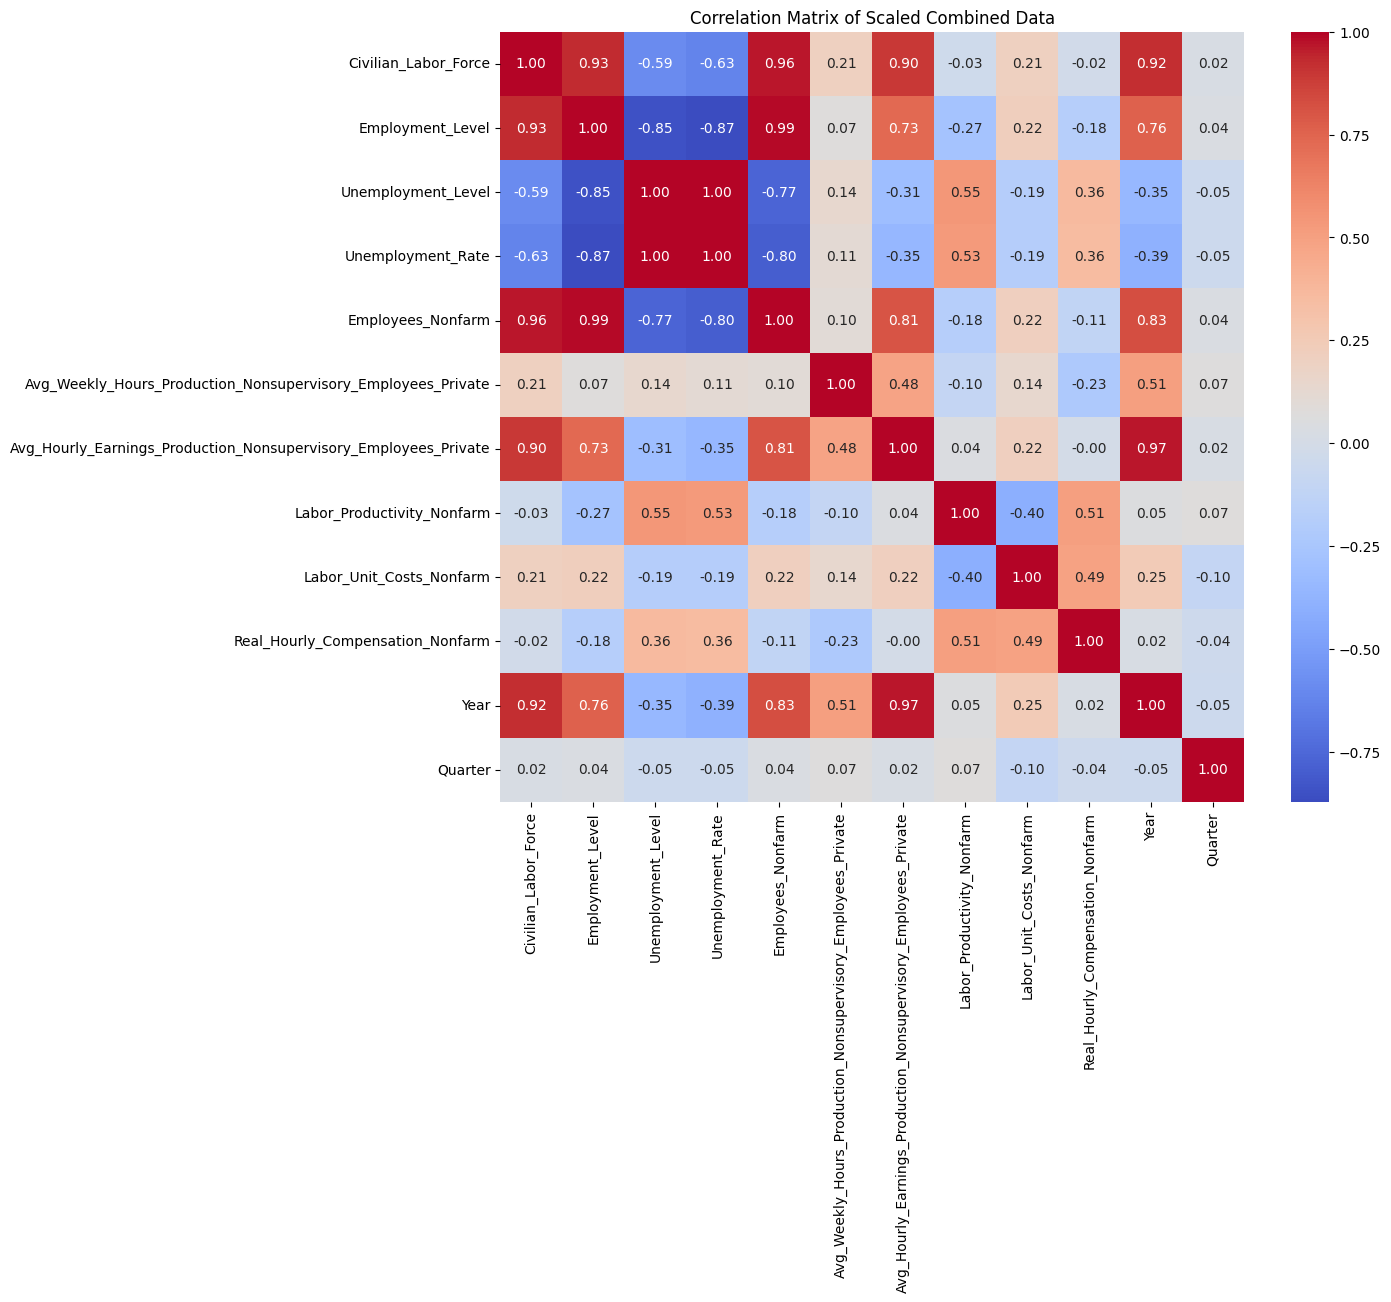

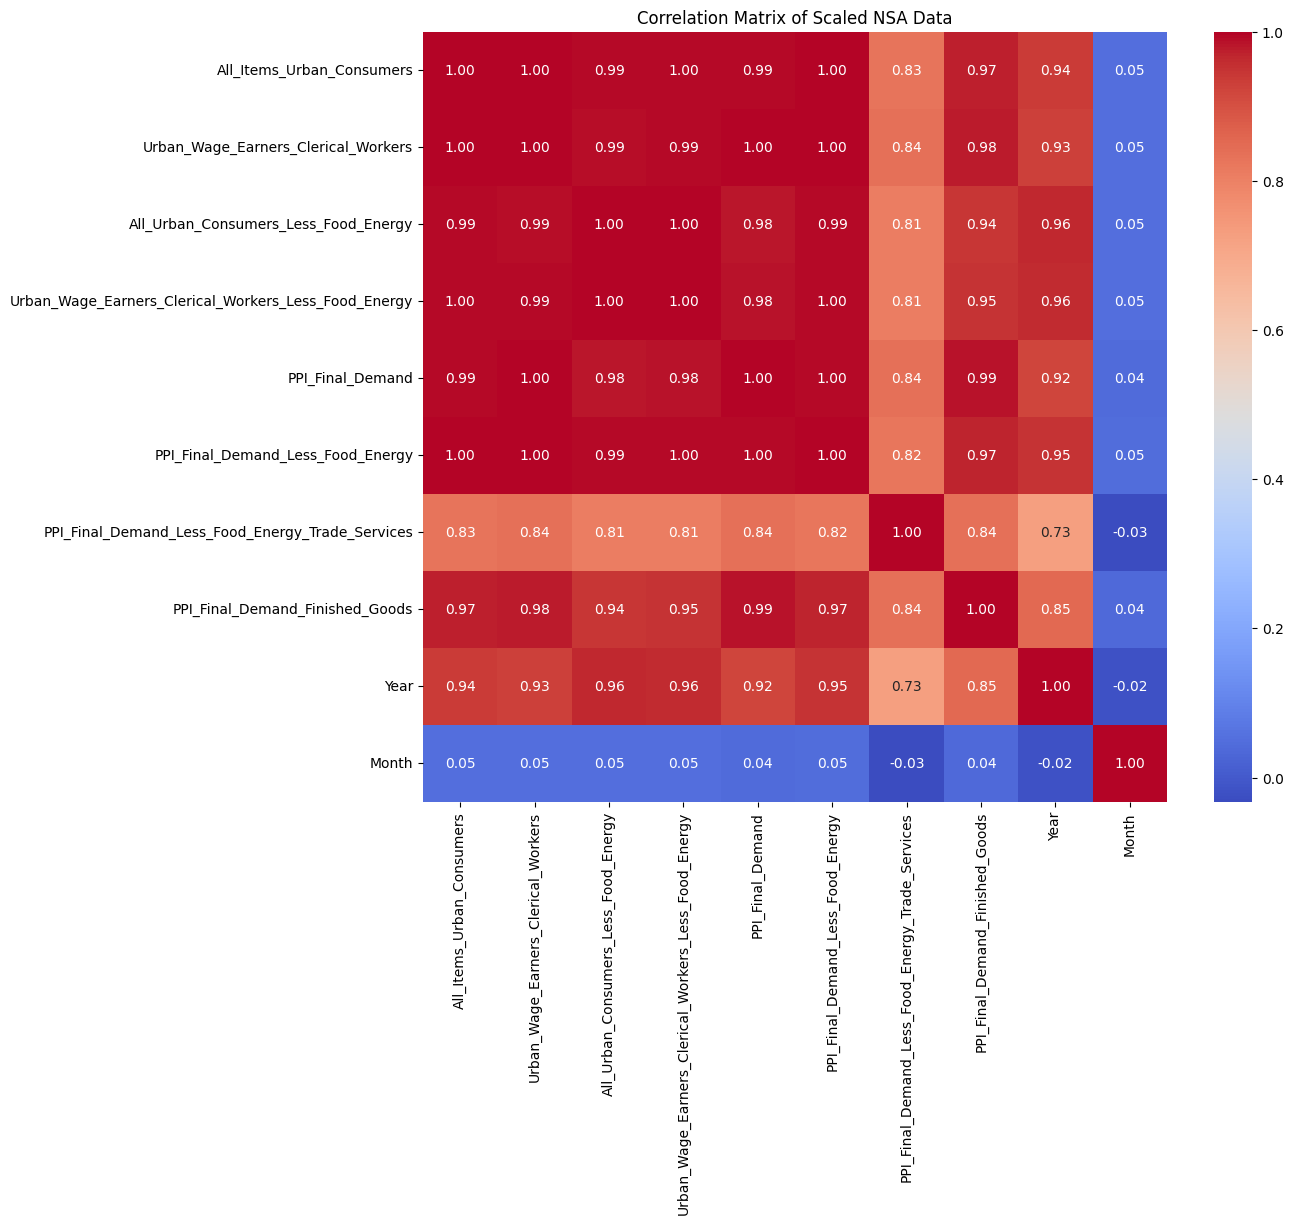

Text(0.5, 1.0, 'Correlation Matrix of Scaled SA Start1974 Data')

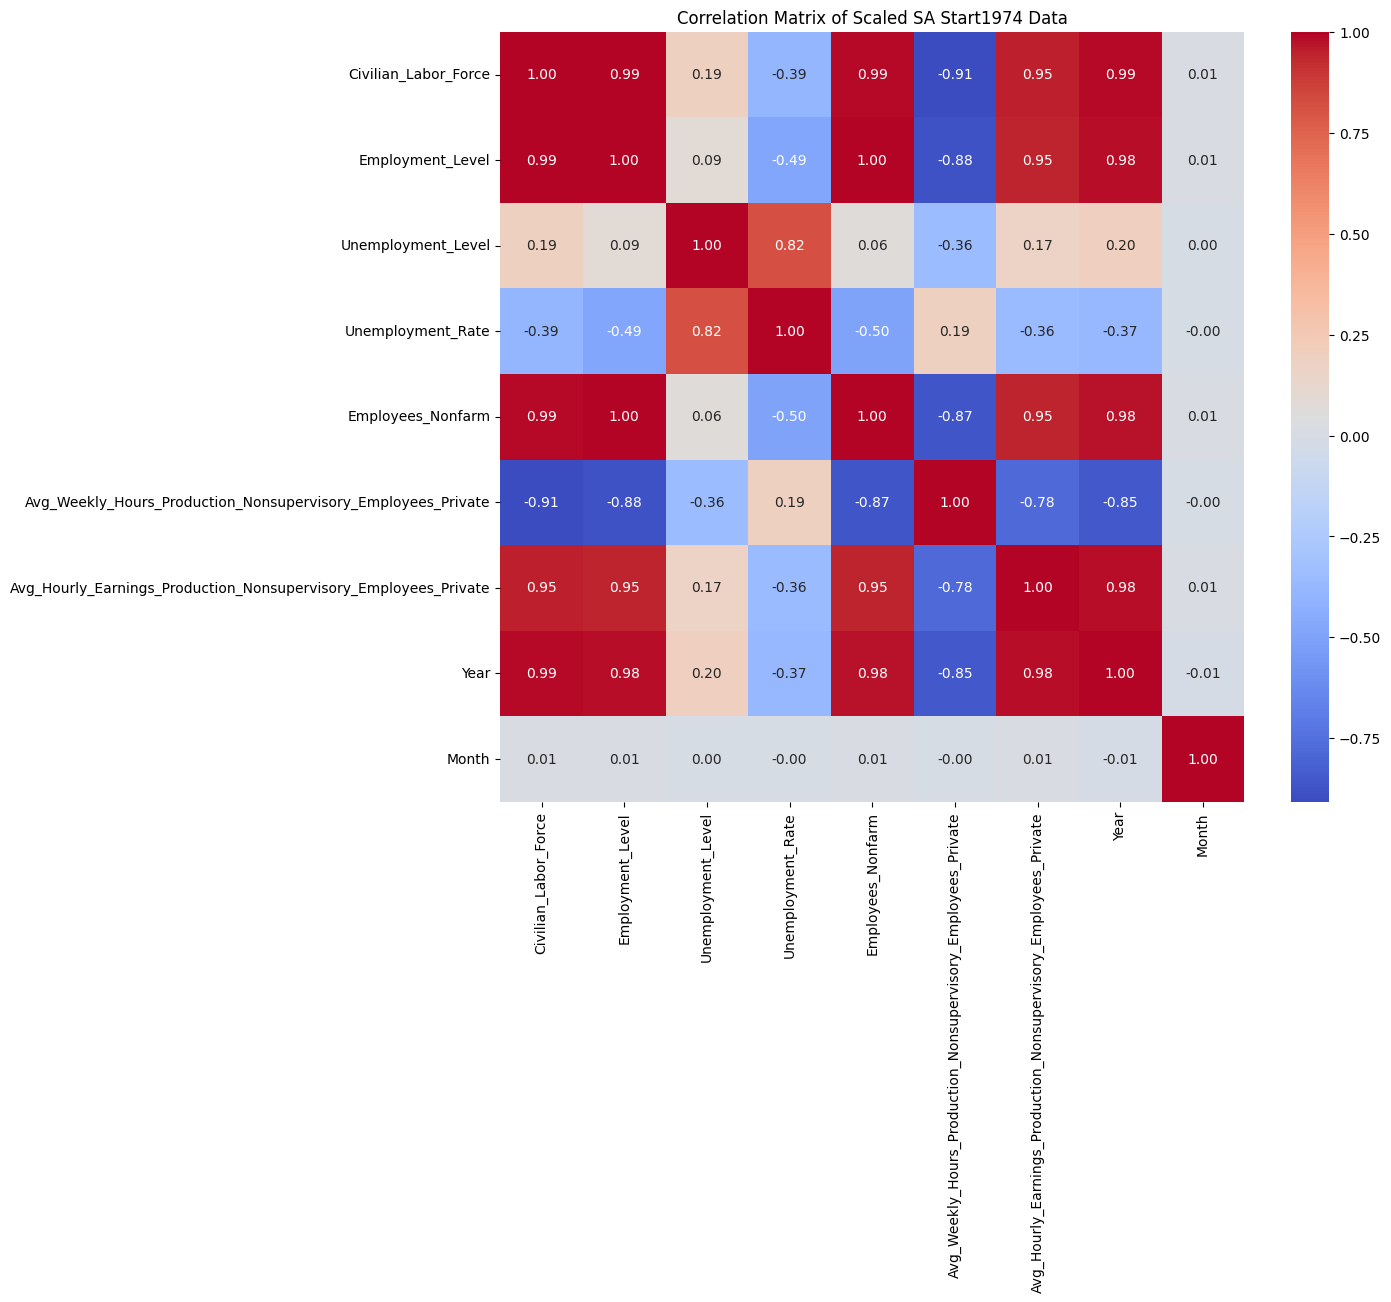

In [118]:
# Correlation Heatmaps
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Combined Data')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_NSA, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled NSA Data')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_SA_start1974, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled SA Start1974 Data')

### **Exploratory Analysis:**

Explore Multicolinearity:

In [119]:
# scaled_df_NSA VIF
df_with_const = add_constant(scaled_df_NSA)
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

                                              feature           VIF
0                                               const  3.386638e+07
1                           All_Items_Urban_Consumers  1.672085e+05
2                 Urban_Wage_Earners_Clerical_Workers  1.122757e+05
3                All_Urban_Consumers_Less_Food_Energy  1.036945e+05
4   Urban_Wage_Earners_Clerical_Workers_Less_Food_...  6.888476e+04
5                                    PPI_Final_Demand  1.925902e+04
6                   PPI_Final_Demand_Less_Food_Energy  1.497881e+04
7    PPI_Final_Demand_Less_Food_Energy_Trade_Services  4.746157e+00
8                     PPI_Final_Demand_Finished_Goods  1.566959e+03
9                                                Year  9.793360e+01
10                                              Month  1.560447e+00


In [120]:
# VIF scaled_df_combined

df_with_const = add_constant(scaled_df_combined)
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

                                              feature           VIF
0                                               const  7.117927e+07
1                                Civilian_Labor_Force  1.893032e+08
2                                    Employment_Level  4.383412e+08
3                                  Unemployment_Level  9.240325e+07
4                                   Unemployment_Rate  1.283624e+04
5                                   Employees_Nonfarm  3.497566e+02
6   Avg_Weekly_Hours_Production_Nonsupervisory_Emp...  1.596638e+01
7   Avg_Hourly_Earnings_Production_Nonsupervisory_...  6.361379e+01
8                          Labor_Productivity_Nonfarm  1.586026e+01
9                            Labor_Unit_Costs_Nonfarm  1.715756e+01
10                   Real_Hourly_Compensation_Nonfarm  1.633352e+01
11                                               Year  2.010206e+02
12                                            Quarter  2.802447e+00


In [121]:
# VIF scaled_df_SA_start1974

df_with_const = add_constant(scaled_df_SA_start1974)
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)


                                             feature           VIF
0                                              const  5.461330e+06
1                               Civilian_Labor_Force  3.519592e+09
2                                   Employment_Level  3.412230e+09
3                                 Unemployment_Level  4.239045e+07
4                                  Unemployment_Rate  7.072304e+01
5                                  Employees_Nonfarm  4.071064e+02
6  Avg_Weekly_Hours_Production_Nonsupervisory_Emp...  1.890129e+01
7  Avg_Hourly_Earnings_Production_Nonsupervisory_...  7.880890e+01
8                                               Year  2.941357e+02
9                                              Month  1.127503e+00


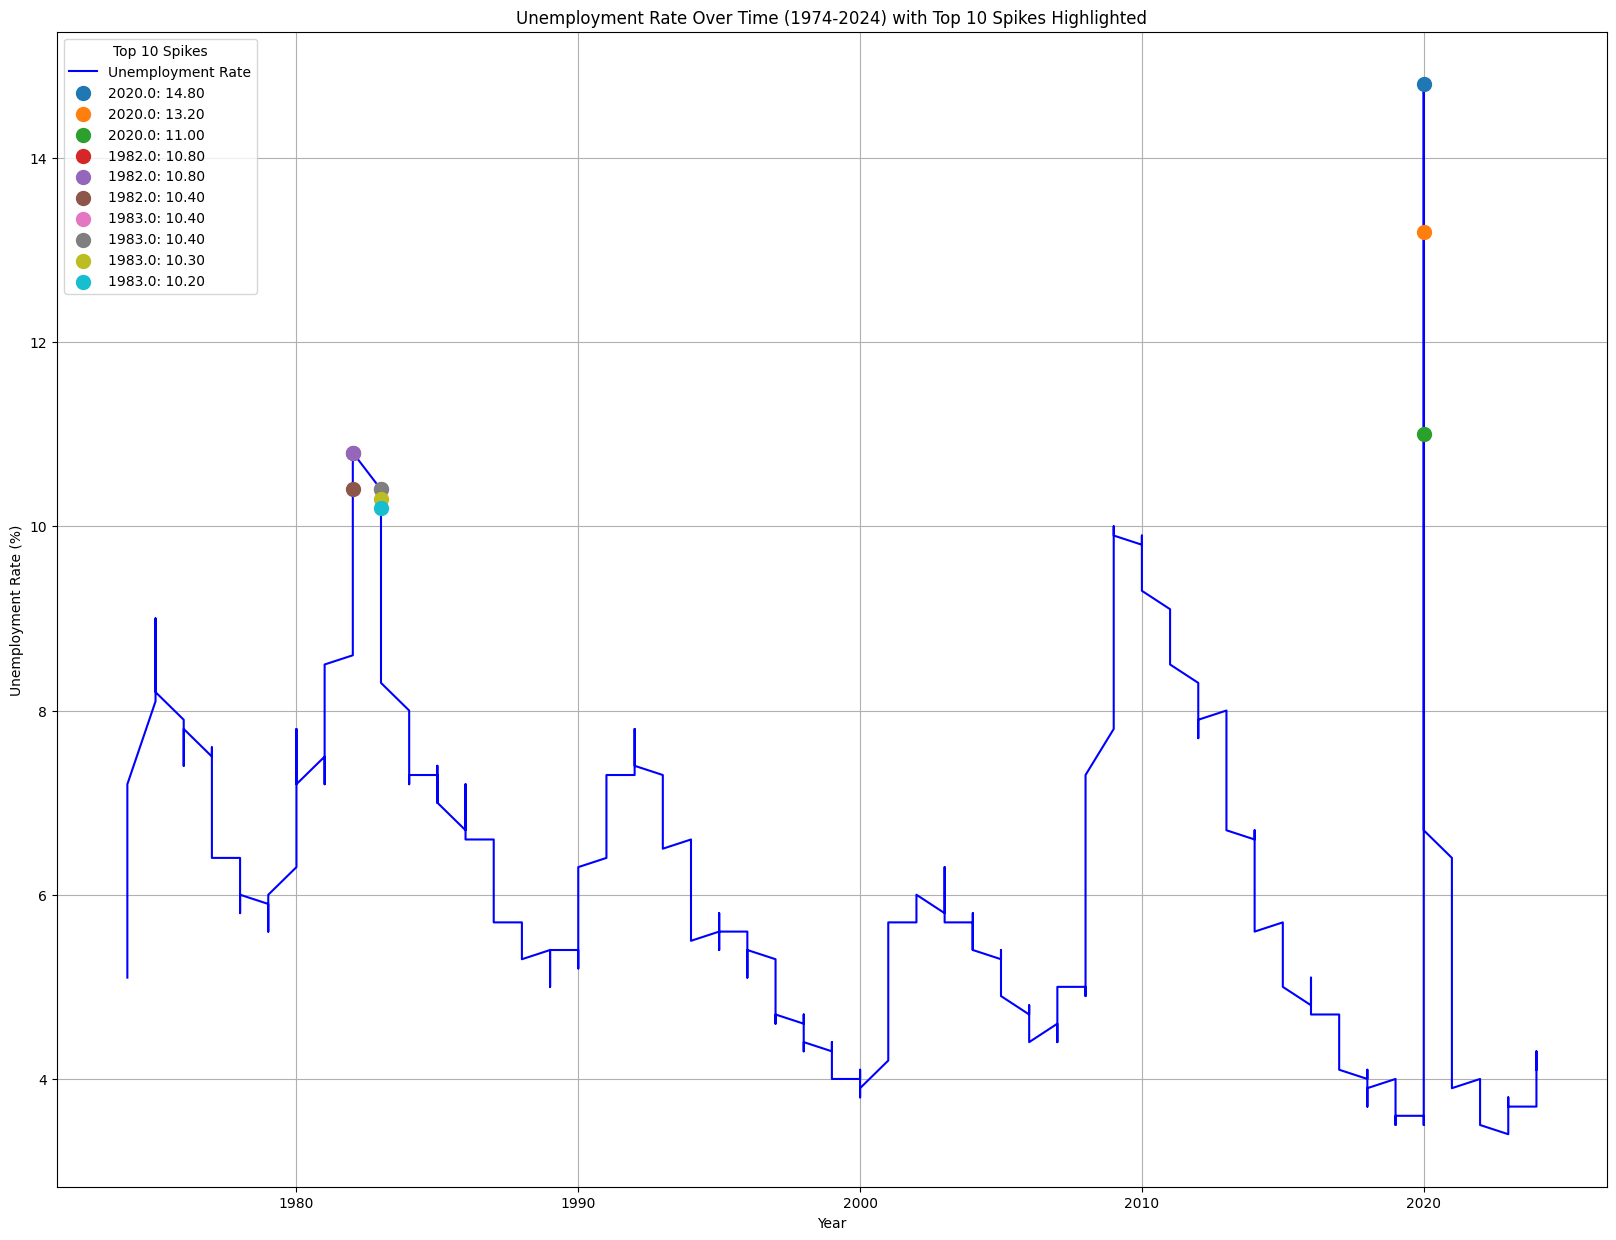

In [122]:
top_10_spikes = df_SA_start1974.nlargest(10, 'Unemployment_Rate')

plt.figure(figsize=(20, 15))
plt.plot(df_SA_start1974['Year'], df_SA_start1974['Unemployment_Rate'], label='Unemployment Rate', color='blue')
colors = list(mcolors.TABLEAU_COLORS.values())[:10]

for i, (index, row) in enumerate(top_10_spikes.iterrows()):
    plt.scatter(row['Year'], row['Unemployment_Rate'], color=colors[i], label=f'{row["Year"]}: {row["Unemployment_Rate"]:.2f}', s=100, zorder=5)  # Increase 's' for bigger dots

plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time (1974-2024) with Top 10 Spikes Highlighted')
plt.legend(title='Top 10 Spikes')
plt.grid(True)
plt.show()

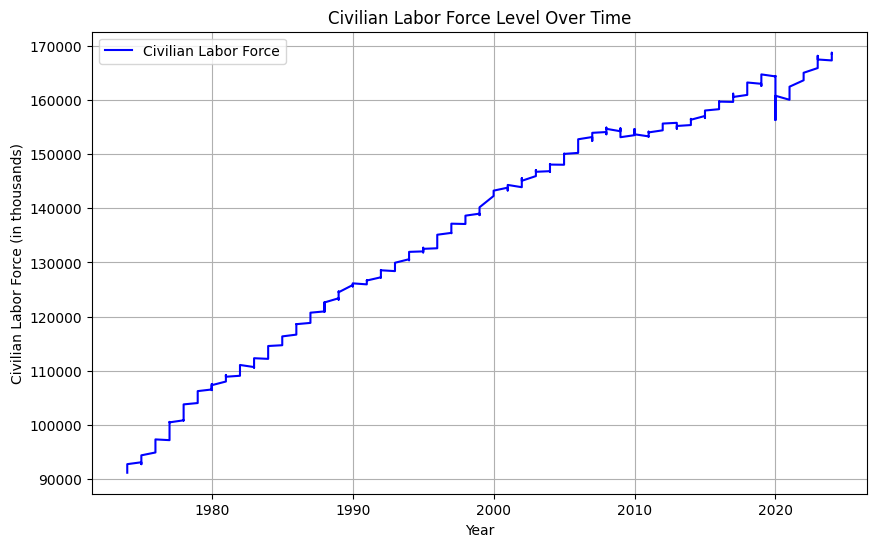

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(df_SA_start1974['Year'], df_SA_start1974['Civilian_Labor_Force'], color='blue', label='Civilian Labor Force')
plt.title('Civilian Labor Force Level Over Time')
plt.xlabel('Year')
plt.ylabel('Civilian Labor Force (in thousands)')
plt.grid(True)
plt.legend()
plt.show()

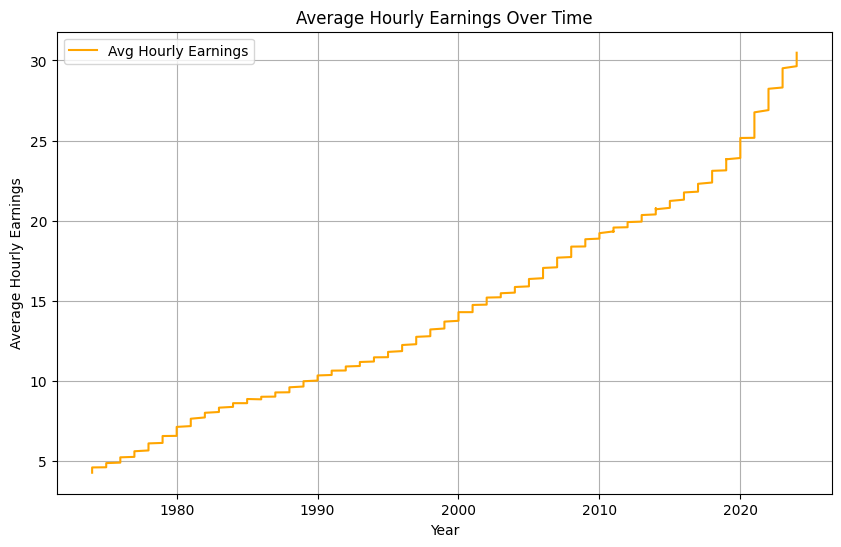

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(df_SA_start1974['Year'], df_SA_start1974['Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private'], color='orange', label='Avg Hourly Earnings')
plt.title('Average Hourly Earnings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Hourly Earnings')
plt.grid(True)
plt.legend()
plt.show()

2013-2024

Linear Regression Mean Squared Error: 0.02868663596116757
Ridge Regression MSE: 0.06175886983652897
Linear Regression Coefficients:
Civilian_Labor_Force: 0.5773475252963485
Employees_Nonfarm: -2.258135042838395
Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private: -0.3355089958059614
Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private: 0.4459816929105045
Labor_Productivity_Nonfarm: -0.1502706808788395
Labor_Unit_Costs_Nonfarm: -0.22392848732548398
Real_Hourly_Compensation_Nonfarm: 0.19887437994098983
Year: 0.2242748387381106
Quarter: 0.06363277205018289
Ridge Regression Coefficients:
Civilian_Labor_Force: -0.10305201742948197
Employees_Nonfarm: -1.2843860539038097
Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private: -0.10676623686709055
Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private: 0.3160624056415924
Labor_Productivity_Nonfarm: 0.059824773891170205
Labor_Unit_Costs_Nonfarm: -0.21217135966443676
Real_Hourly_Compensation_Nonfarm: 0.23307159

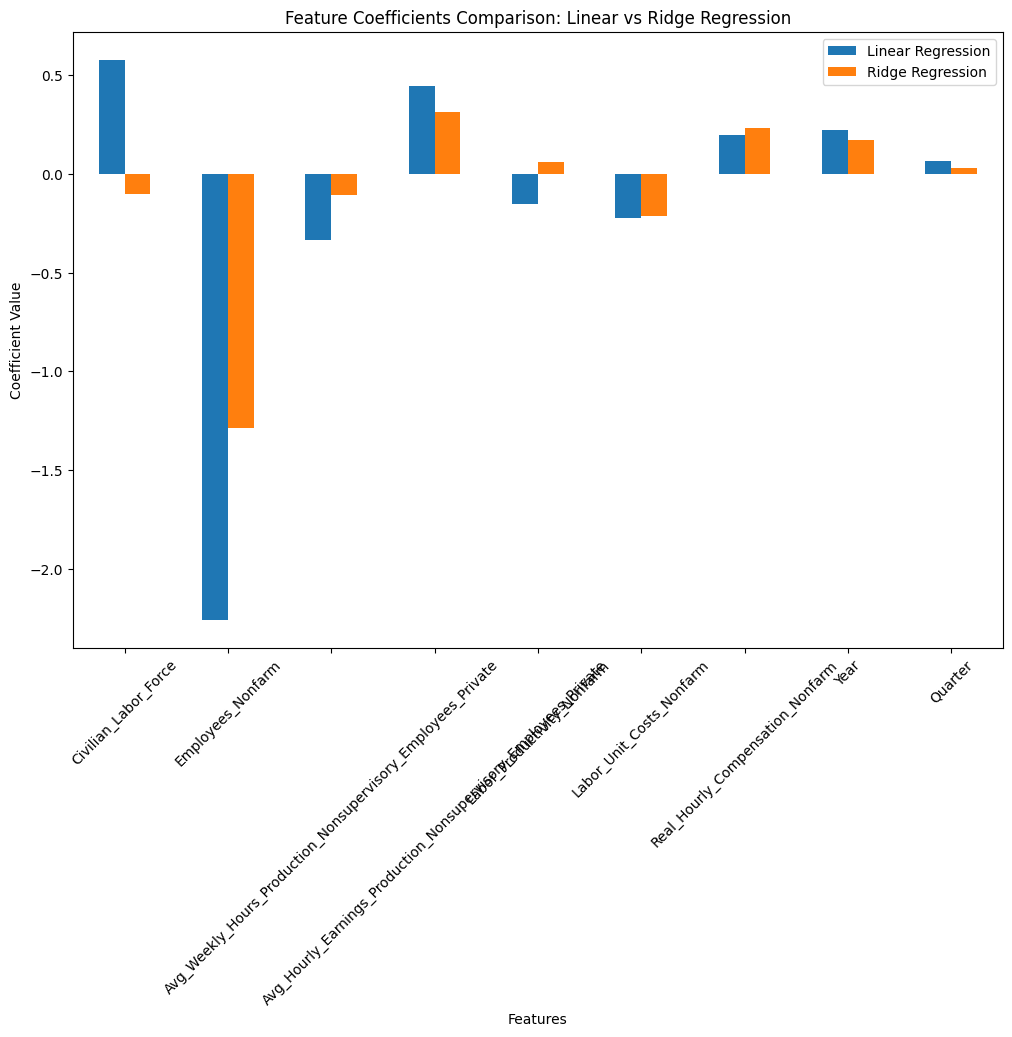

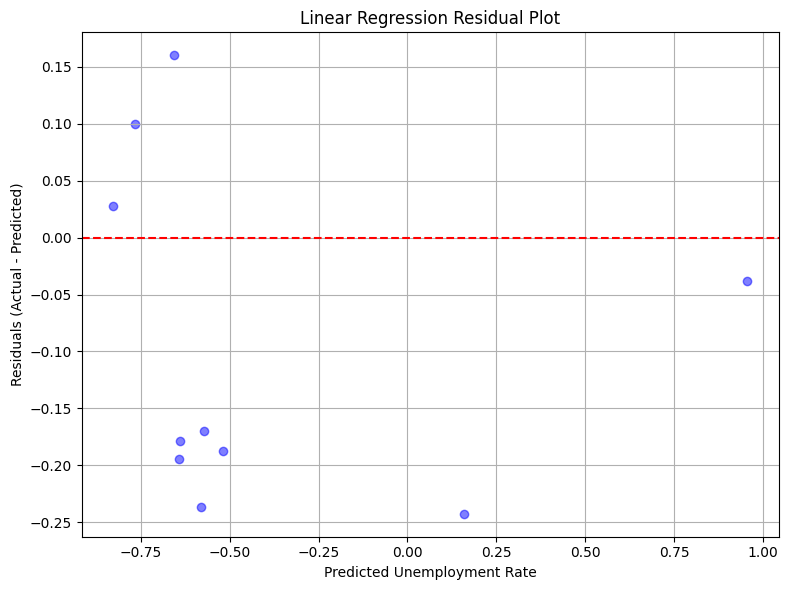

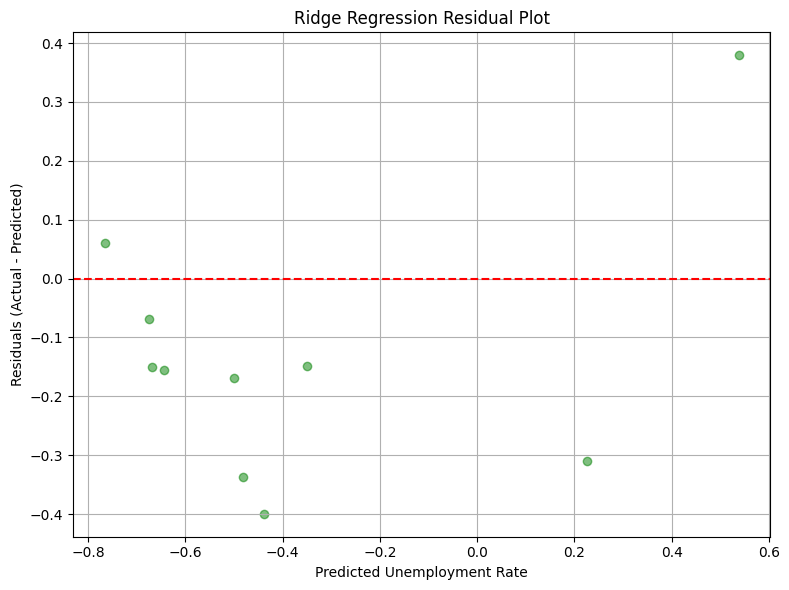

In [125]:
X = scaled_df_combined.drop(columns=['Unemployment_Rate', 'Unemployment_Level', 'Employment_Level'])
y = scaled_df_combined['Unemployment_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

# Coef For Linear Regression
print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, lm.coef_):
    print(f"{feature}: {coef}")

# Coef For Ridge Regression
print("Ridge Regression Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef}")


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lm.coef_,
    'Ridge Regression': ridge.coef_
})


coefficients.set_index('Feature', inplace=True)
coefficients.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Coefficients Comparison: Linear vs Ridge Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

# Linear Regression Residual Plot
residuals_lm = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals_lm, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Linear Regression Residual Plot')
plt.xlabel('Predicted Unemployment Rate')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ridge Regression Residual Plot
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, residuals_ridge, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Regression Residual Plot')
plt.xlabel('Predicted Unemployment Rate')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# Cross-validation for Linear Regression
lm = LinearRegression()
lm_cv_scores = cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
lm_cv_mse = np.mean(-lm_cv_scores)
print("Linear Regression Mean Squared Error (Cross-Validation):", lm_cv_mse)

# Cross-validation for Ridge Regression
ridge = Ridge(alpha=1.0)
ridge_cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_mse = np.mean(-ridge_cv_scores)
print("Ridge Regression Mean Squared Error (Cross-Validation):", ridge_cv_mse)

Linear Regression Mean Squared Error (Cross-Validation): 0.6147787276446469
Ridge Regression Mean Squared Error (Cross-Validation): 0.6083081543645952


Best number of components: 8
Best CV MSE: 0.0637116091619658


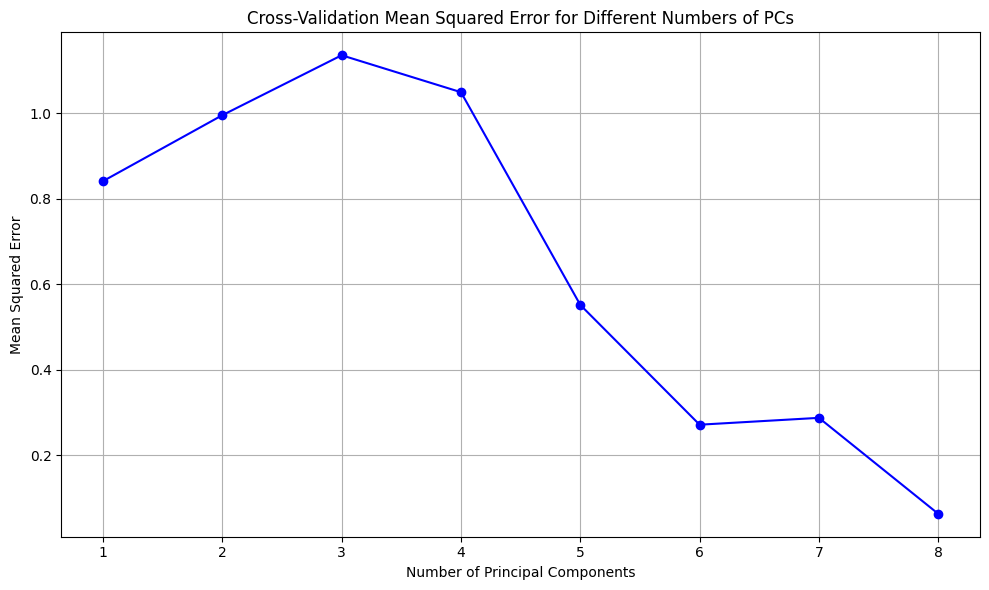

Number of PCs: 1, Mean CV MSE: 0.8410029694929009
Number of PCs: 2, Mean CV MSE: 0.9950555505293733
Number of PCs: 3, Mean CV MSE: 1.1350570997338425
Number of PCs: 4, Mean CV MSE: 1.0487408538296017
Number of PCs: 5, Mean CV MSE: 0.5517303779912058
Number of PCs: 6, Mean CV MSE: 0.27188088984143427
Number of PCs: 7, Mean CV MSE: 0.2879015521740495
Number of PCs: 8, Mean CV MSE: 0.0637116091619658


In [127]:
X = scaled_df_combined.drop(columns=['Unemployment_Rate', 'Employment_Level', 'Unemployment_Level'])  # Dropping Employment_Level and Unemployment_Level
y = scaled_df_combined['Unemployment_Rate']

# Define a pipeline with scaling, PCA, and Linear Regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lr', LinearRegression())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'pca__n_components': range(1, min(X.shape[1], 10))}

grid = GridSearchCV(pipe,
                    param_grid,
                    cv=kf,
                    scoring='neg_mean_squared_error')
grid.fit(X, y)


print(f"Best number of components: {grid.best_params_['pca__n_components']}")
print(f"Best CV MSE: {-grid.best_score_}")


mean_cv_scores = -grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mean_cv_scores) + 1), mean_cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Mean Squared Error for Different Numbers of PCs')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

for n_components, score in zip(range(1, len(mean_cv_scores) + 1), mean_cv_scores):
    print(f"Number of PCs: {n_components}, Mean CV MSE: {score}")


Mean Squared Error (MSE) on Test Set: 0.04706214976971712
R-squared on Test Set: 0.826798265542752


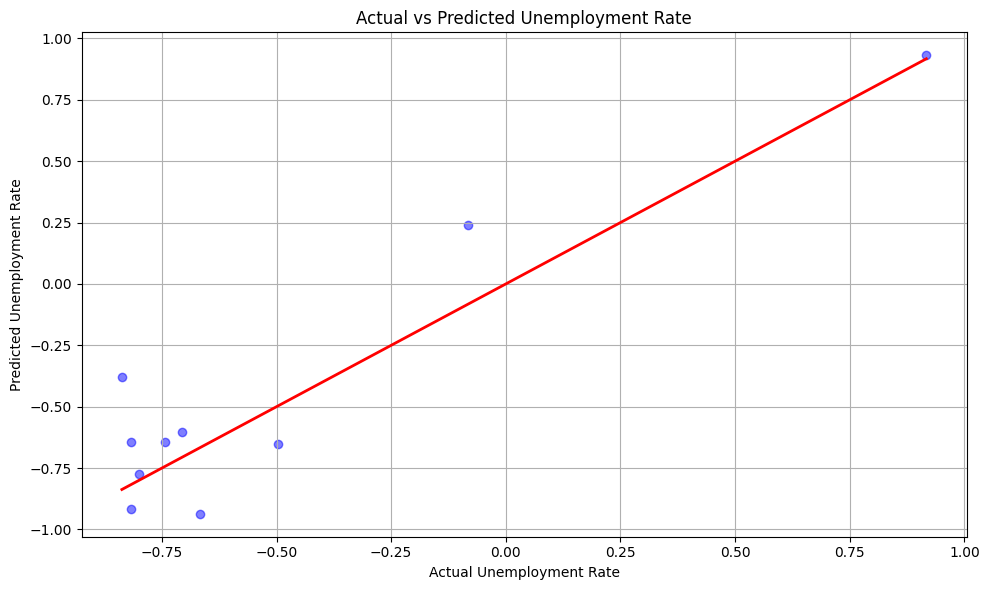

     Civilian_Labor_Force  Employees_Nonfarm  \
PC1              0.240225           0.216755   
PC2             -0.079793          -0.194804   
PC3              0.126352           0.238488   
PC4             -0.185122          -0.260178   
PC5              0.226789           0.268804   
PC6             -0.172944          -0.362459   
PC7              0.199935           0.486107   
PC8             -0.133948           0.477189   

     Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private  \
PC1                                           0.129376              
PC2                                          -0.142583              
PC3                                          -0.315508              
PC4                                           0.607600              
PC5                                          -0.476660              
PC6                                          -0.205818              
PC7                                           0.432438              
PC8            

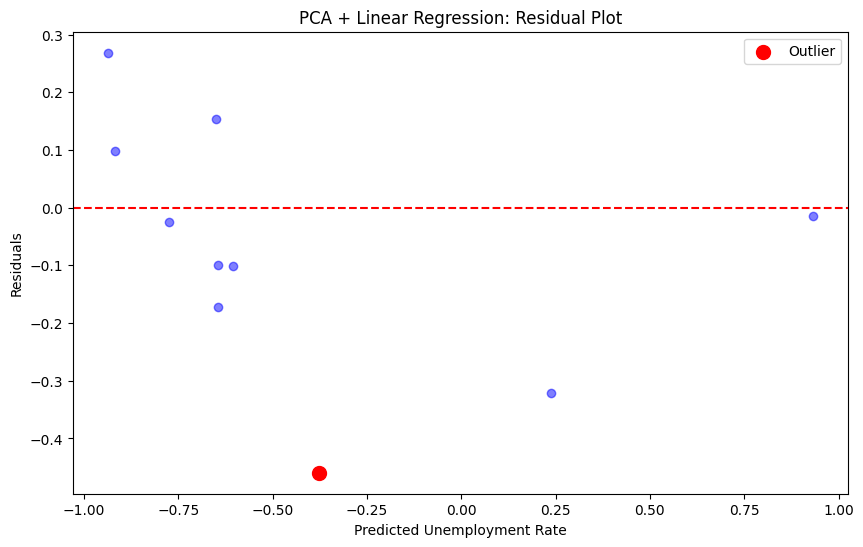

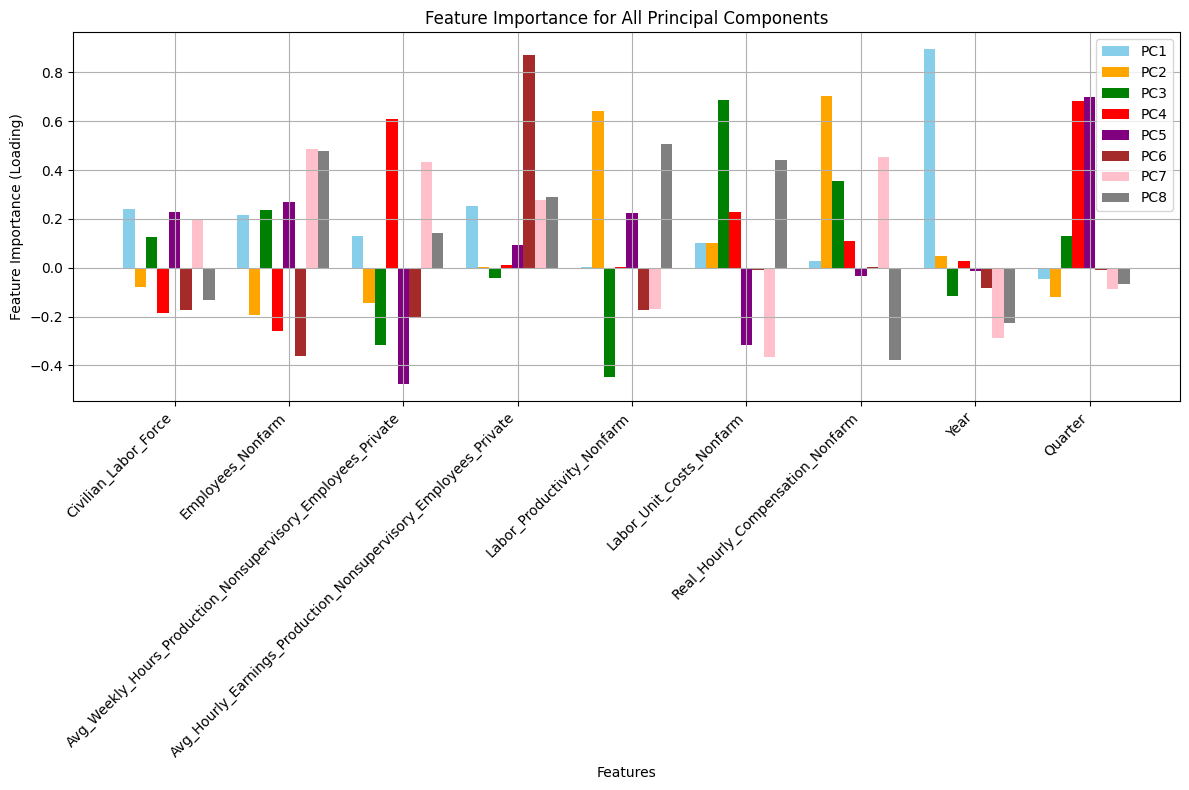

In [128]:
X = scaled_df_combined.drop(columns=['Unemployment_Rate', 'Employment_Level', 'Unemployment_Level'])  # Dropping Employment_Level and Unemployment_Level
y = scaled_df_combined['Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_pca, y_train)
y_pred = lm.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(8)])
print(pca_loadings)


residuals_pca_lm = y_test - y_pred
residuals_df_pca_lm = pd.DataFrame({'Residuals': residuals_pca_lm, 'Predicted': y_pred}, index=X_test.index)
outlier_threshold = 2
outlier_index_pca_lm = residuals_df_pca_lm[np.abs(residuals_df_pca_lm['Residuals']) > outlier_threshold * residuals_df_pca_lm['Residuals'].std()].index
outlier_year_pca_lm = scaled_df_combined.loc[outlier_index_pca_lm, 'Year'].values[0]

print(f"PCA + Linear Regression Outlier year: {outlier_year_pca_lm}")


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_pca_lm, color='blue', alpha=0.5)
plt.scatter(residuals_df_pca_lm.loc[outlier_index_pca_lm, 'Predicted'], residuals_df_pca_lm.loc[outlier_index_pca_lm, 'Residuals'], color='red', s=100, label='Outlier')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('PCA + Linear Regression: Residual Plot')
plt.xlabel('Predicted Unemployment Rate')
plt.ylabel('Residuals')
plt.legend()
plt.show()


num_pcs = pca_loadings.shape[0]
num_features = pca_loadings.shape[1]
bar_width = 0.8 / num_pcs
index = np.arange(num_features)

plt.figure(figsize=(12, 8))
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

for i in range(num_pcs):
    plt.bar(index + i * bar_width, pca_loadings.iloc[i], bar_width, color=colors[i], label=f'PC{i+1}')

plt.xticks(index + bar_width * (num_pcs / 2), pca_loadings.columns, rotation=45, ha='right')
plt.ylabel('Feature Importance (Loading)')
plt.xlabel('Features')
plt.title('Feature Importance for All Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 0.5]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Random Forest Model Mean Squared Error (MSE) on Test Set: {mse}")
print(f"Best Random Forest Model R-squared on Test Set: {r2}")

feature_importances = best_rf.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"Feature: {name}, Importance: {importance}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

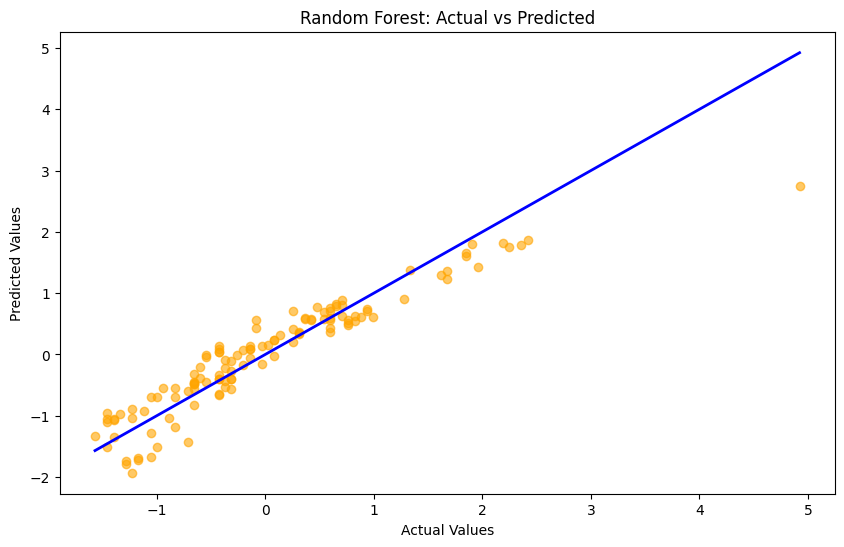

Random Forest Outlier year: 2020


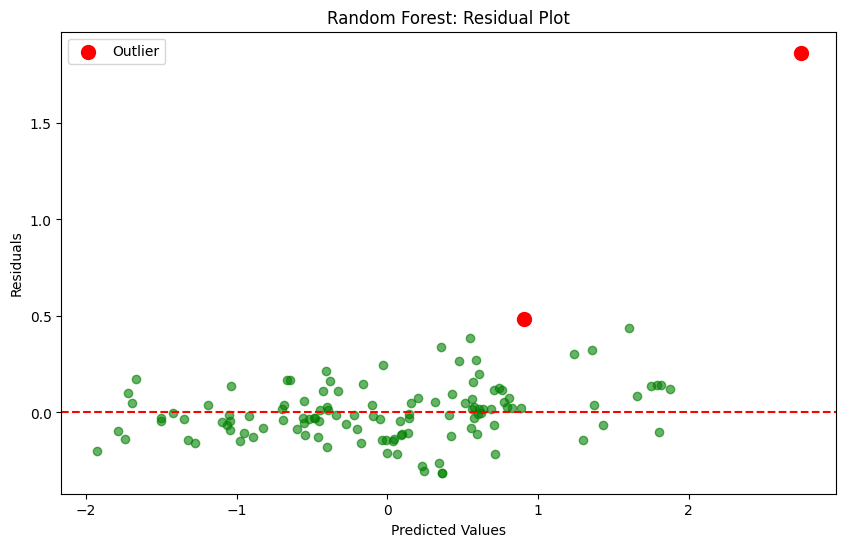

In [ ]:
residuals_df_rf = pd.DataFrame({'Residuals': residuals, 'Predicted': y_pred}, index=X_test.index)
outlier_threshold = 2
outlier_index_rf = residuals_df_rf[np.abs(residuals_df_rf['Residuals']) > outlier_threshold * residuals_df_rf['Residuals'].std()].index
outlier_year_rf = df_SA_start1974.loc[outlier_index_rf, 'Year'].values[0]

print(f"Random Forest Outlier year: {outlier_year_rf}")

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.scatter(residuals_df_rf.loc[outlier_index_rf, 'Predicted'], residuals_df_rf.loc[outlier_index_rf, 'Residuals'], color='red', s=100, label='Outlier')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.legend()
plt.show()

1974-2024

In [130]:
X = scaled_df_SA_start1974.drop(columns=['Unemployment_Rate', 'Unemployment_Level', 'Employment_Level'])
y = scaled_df_SA_start1974['Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

# Coef For Linear Regression
print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, lm.coef_):
    print(f"{feature}: {coef}")

# Coef For Ridge Regression
print("Ridge Regression Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef}")

Linear Regression Mean Squared Error: 0.132502427058951
Ridge Regression MSE: 0.1520708539208546
Linear Regression Coefficients:
Civilian_Labor_Force: 4.562546101974263
Employees_Nonfarm: -5.822793809872975
Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private: -0.13553075932701653
Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private: 0.2581483493014612
Year: 0.030604773885102077
Month: 0.002442754634815178
Ridge Regression Coefficients:
Civilian_Labor_Force: 1.7653660660170205
Employees_Nonfarm: -4.489228640451179
Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private: -0.5938262486166783
Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private: -0.06993203581770205
Year: 0.12528110864387926
Month: 0.01024856418014214


Gradient Boosting MSE: 0.05014073108856459
Civilian_Labor_Force: 0.1462582702113998
Employees_Nonfarm: 0.45911070720313246
Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private: 0.0806884231293822
Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private: 0.270212119716758
Year: 0.043532006310871965
Month: 0.00019847342845559715


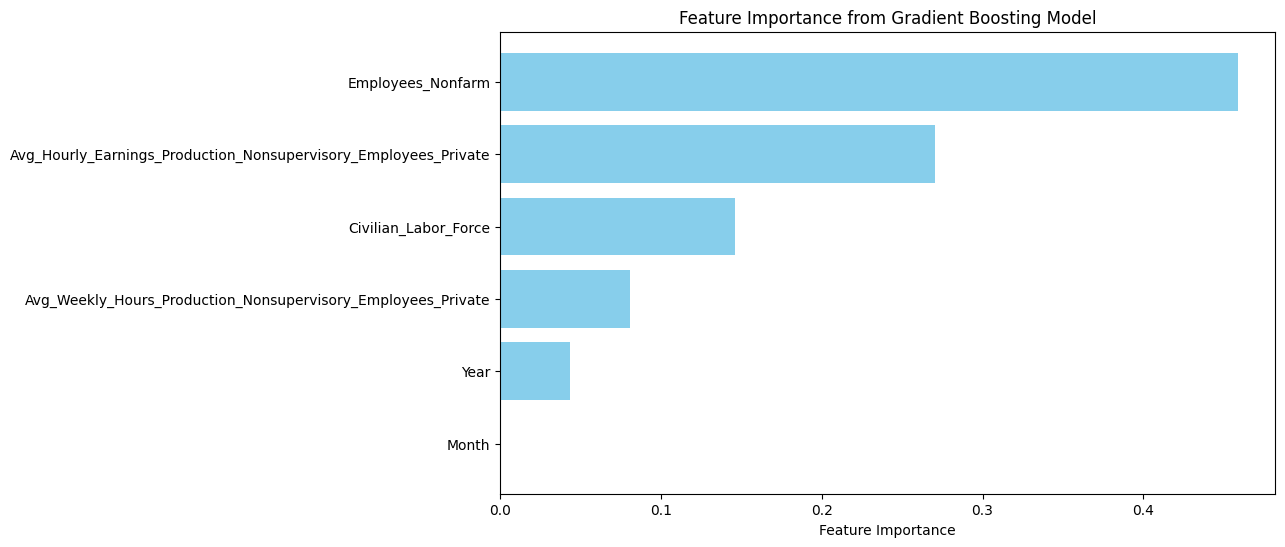

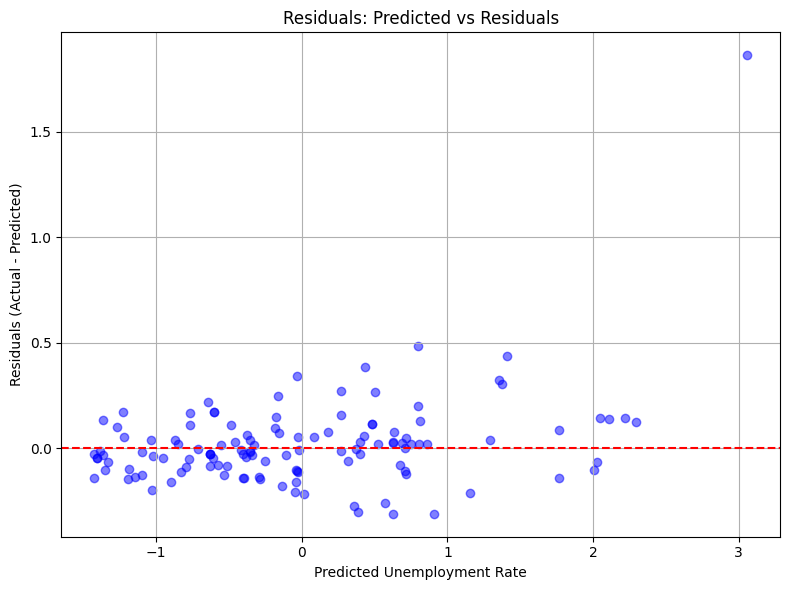

Outlier year: 2020


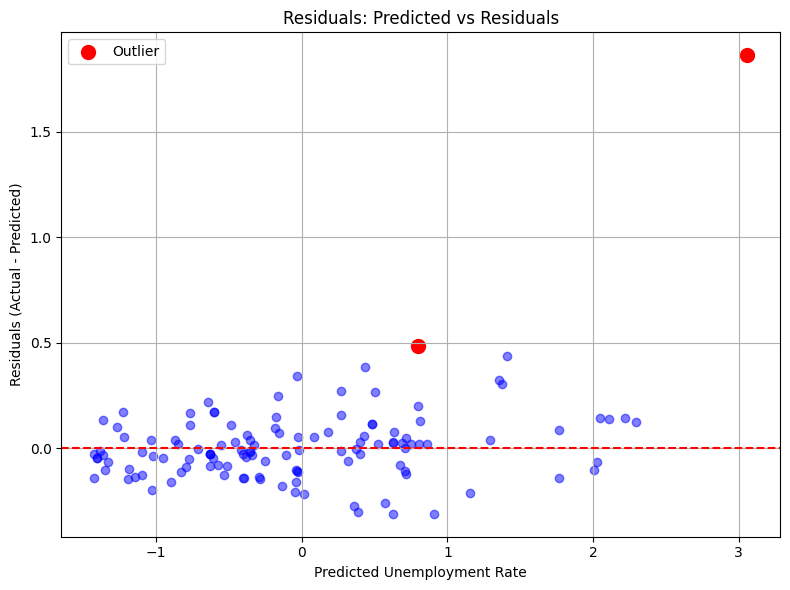

In [131]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)

feature_importances = gb.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

importances = gb.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()

residuals = y_test - y_pred_gb
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals: Predicted vs Residuals')
plt.xlabel('Predicted Unemployment Rate')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

residuals_df = pd.DataFrame({'Residuals': residuals, 'Predicted': y_pred_gb}, index=X_test.index)
outlier_threshold = 2
outlier_index = residuals_df[np.abs(residuals_df['Residuals']) > outlier_threshold * residuals_df['Residuals'].std()].index
outlier_year = df_SA_start1974.loc[outlier_index, 'Year'].values[0]
print(f"Outlier year: {outlier_year}")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, residuals, color='blue', alpha=0.5)
plt.scatter(residuals_df.loc[outlier_index, 'Predicted'], residuals_df.loc[outlier_index, 'Residuals'], color='red', s=100, label='Outlier')  # Highlight outlier
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals: Predicted vs Residuals')
plt.xlabel('Predicted Unemployment Rate')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best number of components: 5
Best CV MSE: 0.14989399376491058


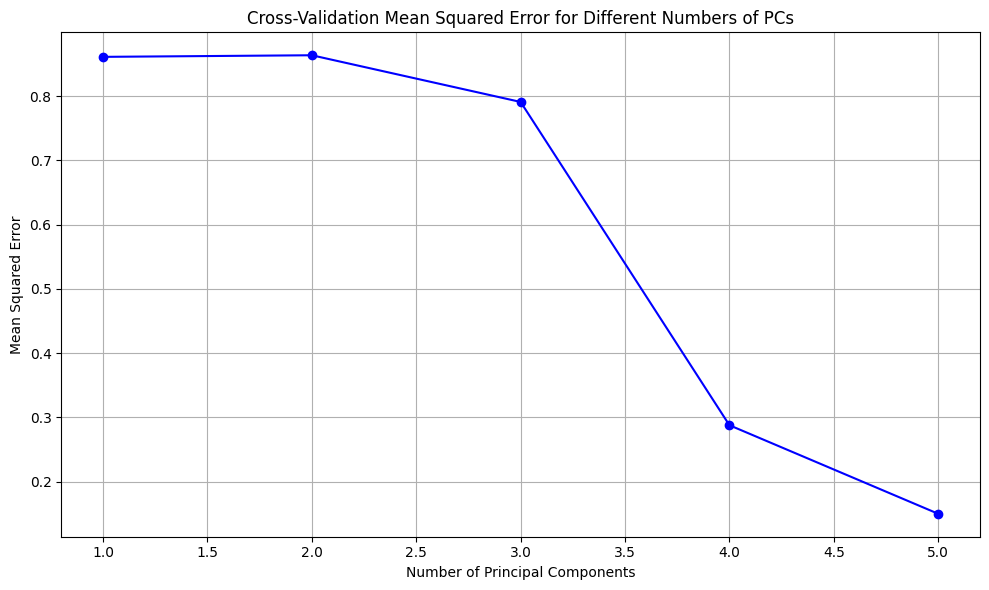

Number of PCs: 1, Mean CV MSE: 0.8612256134610256
Number of PCs: 2, Mean CV MSE: 0.8637038906817951
Number of PCs: 3, Mean CV MSE: 0.7910074931765063
Number of PCs: 4, Mean CV MSE: 0.28776550944119944
Number of PCs: 5, Mean CV MSE: 0.14989399376491058


In [132]:
X = scaled_df_SA_start1974.drop(columns=['Unemployment_Rate', 'Unemployment_Level', 'Employment_Level'])
y = scaled_df_SA_start1974['Unemployment_Rate']
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lr', LinearRegression())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'pca__n_components': range(1, min(X.shape[1], 10))}
grid = GridSearchCV(pipe,
                    param_grid,
                    cv=kf,
                    scoring='neg_mean_squared_error')

grid.fit(X, y)

print(f"Best number of components: {grid.best_params_['pca__n_components']}")
print(f"Best CV MSE: {-grid.best_score_}")

mean_cv_scores = -grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mean_cv_scores) + 1), mean_cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Mean Squared Error for Different Numbers of PCs')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

for n_components, score in zip(range(1, len(mean_cv_scores) + 1), mean_cv_scores):
    print(f"Number of PCs: {n_components}, Mean CV MSE: {score}")

Mean Squared Error (MSE) on Test Set: 0.19469264304712144
R-squared on Test Set: 0.820842957837627
     Civilian_Labor_Force  Employees_Nonfarm  \
PC1              0.066920           0.066285   
PC2              0.003507           0.003117   
PC3             -0.253535          -0.165747   
PC4              0.331923           0.859652   
PC5             -0.010283           0.312410   

     Avg_Weekly_Hours_Production_Nonsupervisory_Employees_Private  \
PC1                                          -0.058138              
PC2                                          -0.000108              
PC3                                           0.927853              
PC4                                           0.301234              
PC5                                          -0.147970              

     Avg_Hourly_Earnings_Production_Nonsupervisory_Employees_Private  \
PC1                                           0.066306                 
PC2                                           0.00583

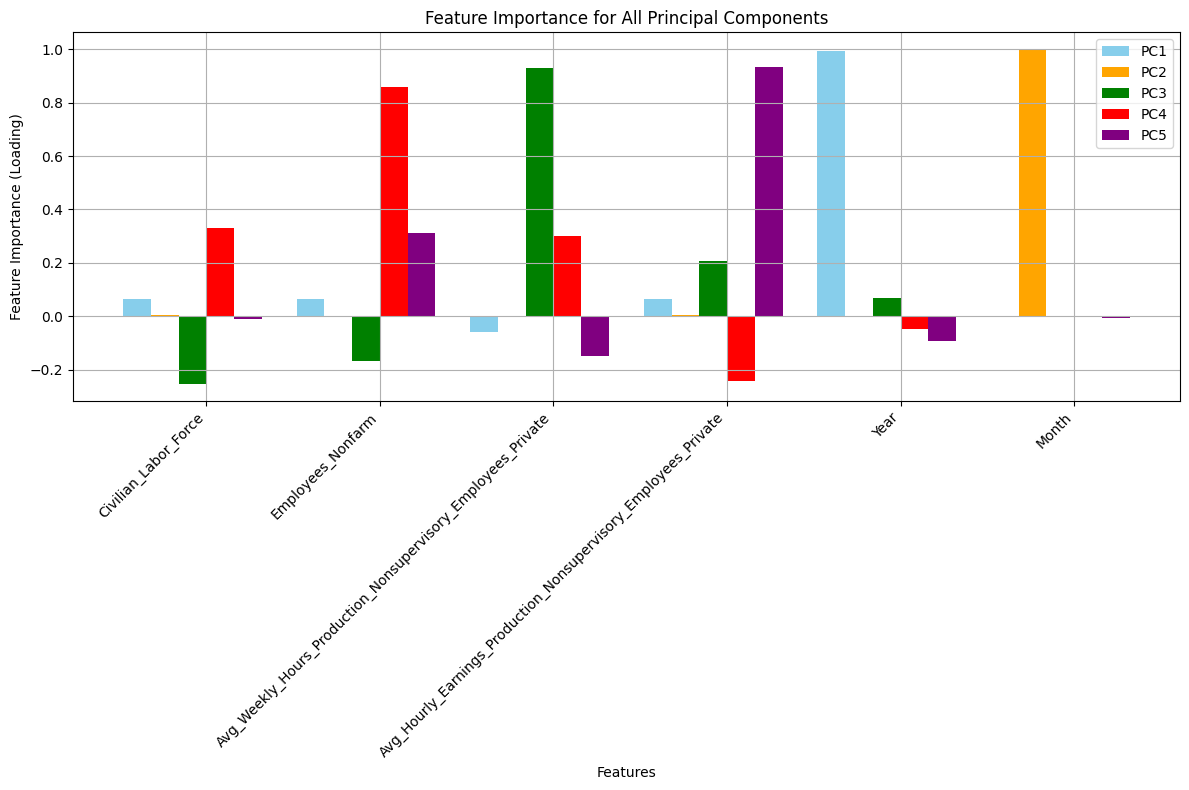

In [133]:
X = scaled_df_SA_start1974.drop(columns=['Unemployment_Rate', 'Unemployment_Level', 'Employment_Level'])
y = scaled_df_SA_start1974['Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_pca, y_train)
y_pred = lm.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")

pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(5)])
print(pca_loadings)


num_pcs = pca_loadings.shape[0]
num_features = pca_loadings.shape[1]
bar_width = 0.8 / num_pcs
index = np.arange(num_features)

plt.figure(figsize=(12, 8))
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

for i in range(num_pcs):
    plt.bar(index + i * bar_width, pca_loadings.iloc[i], bar_width, color=colors[i], label=f'PC{i+1}')

plt.xticks(index + bar_width * (num_pcs / 2), pca_loadings.columns, rotation=45, ha='right')
plt.ylabel('Feature Importance (Loading)')
plt.xlabel('Features')
plt.title('Feature Importance for All Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()